In [1]:
from shapely.geometry import Point

import pandas as pd
import numpy as np
import seaborn as sb
import geopandas as gpd
import contextily as cx

In [8]:
df = pd.read_csv("data/savings.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)

pos = pd.read_csv("data/bap/position.csv")
df["lat"], df["lon"] = pos["long"], pos["lat"] # yes its switched, oops

df

,solar,grid,savings,lat,lon
0,59.943348,373.72733,313.783970,-71.032154,42.379519
1,50.381783,313.63986,263.258100,-71.031737,42.379686
2,44.015220,273.63068,229.615450,-71.031658,42.379716
3,24.475342,150.83678,126.361435,-71.032486,42.379481
4,64.044130,399.49774,335.453600,-71.032362,42.379533
...,...,...,...,...,...
8956,54.303516,323.05978,268.756260,-71.063084,42.360638
8957,39.580570,407.22397,367.643400,-71.161901,42.378860
8958,50.798580,302.02515,251.226560,-71.063084,42.360638
8959,54.340034,323.27893,268.938900,-71.063071,42.360789


In [9]:
geometry = [Point(xy) for xy in zip(df["lat"], df["lon"])]
gdf = gpd.GeoDataFrame(df, geometry = geometry)

gdf["savings"] = df["savings"]

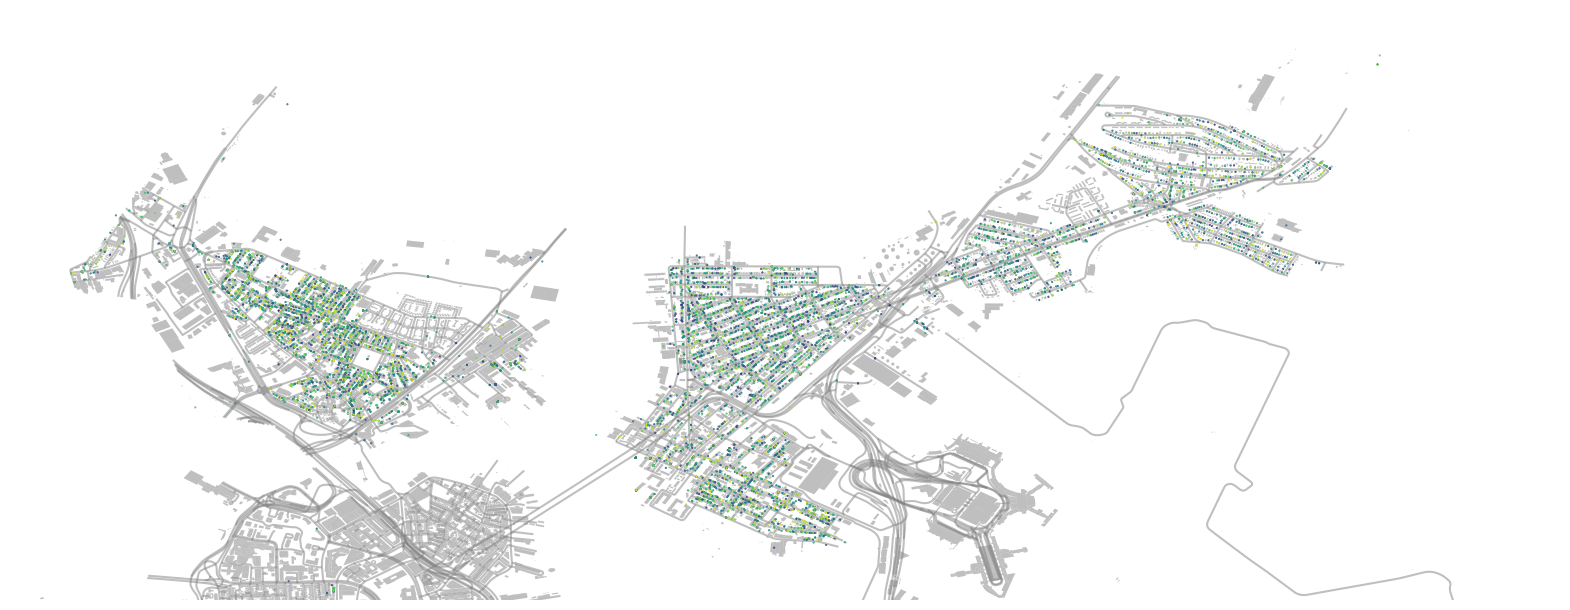

In [21]:
homes = gpd.read_file("data/roofs.geojson")
base = homes.plot(color = 'gray', alpha = 0.5, figsize=(20, 20))

base.set_aspect('equal')
base.set_xlim(-71.085, -70.98)
base.set_ylim(42.360, 42.400)

streets = gpd.read_file("data/boston.geojson")
streets.plot(ax = base, color = 'gray', alpha = 0.5)

ax = gdf.plot(ax = base, marker='.', markersize=1, column = "savings", zorder = 13)
ax.set_axis_off()

ax.figure.savefig("visual/savings.png")